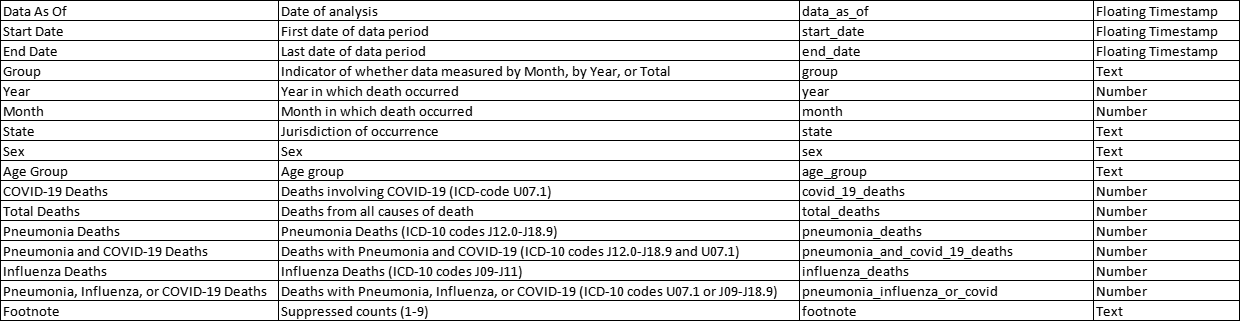

In [6]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("GoogleColabSpark") \
    .getOrCreate()

# Show Spark version
print(spark.version)


3.1.2


In [7]:
# Libraries to help with reading and manipulating data
from pyspark.sql.functions import monotonically_increasing_id, rand
from pyspark.sql import functions as F
from pyspark.sql.functions import to_timestamp
from pyspark.sql.types import IntegerType, DoubleType, StringType

In [8]:
# Read DataFrame in Spark
data = spark.read.csv('/project_covid19/Provisional_COVID-19_Deaths_by_Sex_and_Age_20250118.csv', header=True, sep=",") # Read from your actual file directory

In [9]:
# Check if dataset is loaded correctly
data.show(5)

+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------------------+--------+
|Data As Of|Start Date|  End Date|   Group|Year|Month|        State|      Sex|   Age Group|COVID-19 Deaths|Total Deaths|Pneumonia Deaths|Pneumonia and COVID-19 Deaths|Influenza Deaths|Pneumonia, Influenza, or COVID-19 Deaths|Footnote|
+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------------------+--------+
|09/27/2023|01/01/2020|09/23/2023|By Total|null| null|United States|All Sexes|    All Ages|        1146774|    12303399|         1162844|                       569264|           22229|                                 1760095|    null|
|09/27/2023|01/01/2020|09/23/2023|By Total|null| null|United

In [10]:
data.count()

137700

In [11]:
# Standardized the column names for better readability and consistency
data = data.select(
    F.col('Data As Of').alias("data_as_of"),
    F.col('Start Date').alias("start_date"),
    F.col('End Date').alias("end_date"),
    F.col('Group').alias("group"),
    F.col('Year').alias("year"),
    F.col('Month').alias("month"),
    F.col('State').alias("state"),
    F.col('Sex').alias("sex"),
    F.col('Age Group').alias("age_group"),
    F.col('COVID-19 Deaths').alias("covid_19_deaths"),
    F.col('Total Deaths').alias("total_deaths"),
    F.col('Pneumonia Deaths').alias("pneumonia_deaths"),
    F.col('Pneumonia and COVID-19 Deaths').alias("pneumonia_and_covid_19_deaths"),
    F.col('Influenza Deaths').alias("influenza_deaths"),
    F.col('Pneumonia, Influenza, or COVID-19 Deaths').alias("pneumonia_influenza_or_covid"),
    F.col('Footnote').alias("footnote")
)

In [12]:
data.show(5)

+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+
|data_as_of|start_date|  end_date|   group|year|month|        state|      sex|   age_group|covid_19_deaths|total_deaths|pneumonia_deaths|pneumonia_and_covid_19_deaths|influenza_deaths|pneumonia_influenza_or_covid|footnote|
+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+
|09/27/2023|01/01/2020|09/23/2023|By Total|null| null|United States|All Sexes|    All Ages|        1146774|    12303399|         1162844|                       569264|           22229|                     1760095|    null|
|09/27/2023|01/01/2020|09/23/2023|By Total|null| null|United States|All Sexes|Under 1 year|            519| 

In [13]:
# Check Data types
data.printSchema()

root
 |-- data_as_of: string (nullable = true)
 |-- start_date: string (nullable = true)
 |-- end_date: string (nullable = true)
 |-- group: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age_group: string (nullable = true)
 |-- covid_19_deaths: string (nullable = true)
 |-- total_deaths: string (nullable = true)
 |-- pneumonia_deaths: string (nullable = true)
 |-- pneumonia_and_covid_19_deaths: string (nullable = true)
 |-- influenza_deaths: string (nullable = true)
 |-- pneumonia_influenza_or_covid: string (nullable = true)
 |-- footnote: string (nullable = true)



In [16]:
# Convert the columns to the correct data types
df_correct_types = data \
    .withColumn('data_as_of', F.to_date('data_as_of', 'MM/dd/yyyy')) \
    .withColumn('start_date', F.to_date('start_date', 'MM/dd/yyyy')) \
    .withColumn('end_date', F.to_date('end_date', 'MM/dd/yyyy')) \
    .withColumn('group', F.col('group').cast(StringType())) \
    .withColumn('year', F.col('year').cast(IntegerType())) \
    .withColumn('month', F.col('month').cast(IntegerType())) \
    .withColumn('state', F.col('state').cast(StringType())) \
    .withColumn('sex', F.col('sex').cast(StringType())) \
    .withColumn('age_group', F.col('age_group').cast(StringType())) \
    .withColumn('covid_19_deaths', F.col('covid_19_deaths').cast(IntegerType())) \
    .withColumn('total_deaths', F.col('total_deaths').cast(IntegerType())) \
    .withColumn('pneumonia_deaths', F.col('pneumonia_deaths').cast(IntegerType())) \
    .withColumn('pneumonia_and_covid_19_deaths', F.col('pneumonia_and_covid_19_deaths').cast(IntegerType())) \
    .withColumn('influenza_deaths', F.col('influenza_deaths').cast(IntegerType())) \
    .withColumn('pneumonia_influenza_or_covid', F.col('pneumonia_influenza_or_covid').cast(IntegerType())) \
    .withColumn('footnote', F.col('footnote').cast(StringType()))


In [17]:
df_correct_types.show(5)

+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+
|data_as_of|start_date|  end_date|   group|year|month|        state|      sex|   age_group|covid_19_deaths|total_deaths|pneumonia_deaths|pneumonia_and_covid_19_deaths|influenza_deaths|pneumonia_influenza_or_covid|footnote|
+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|    All Ages|        1146774|    12303399|         1162844|                       569264|           22229|                     1760095|    null|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|Under 1 year|            519| 

In [18]:
# Show the updated schema
df_correct_types.printSchema()

root
 |-- data_as_of: date (nullable = true)
 |-- start_date: date (nullable = true)
 |-- end_date: date (nullable = true)
 |-- group: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age_group: string (nullable = true)
 |-- covid_19_deaths: integer (nullable = true)
 |-- total_deaths: integer (nullable = true)
 |-- pneumonia_deaths: integer (nullable = true)
 |-- pneumonia_and_covid_19_deaths: integer (nullable = true)
 |-- influenza_deaths: integer (nullable = true)
 |-- pneumonia_influenza_or_covid: integer (nullable = true)
 |-- footnote: string (nullable = true)



In [19]:
# Define the columns to check for missing data
columns_to_check = [
    "covid_19_deaths",
    "total_deaths",
    "pneumonia_deaths",
    "pneumonia_and_covid_19_deaths",
    "influenza_deaths",
    "pneumonia_influenza_or_covid"
]

# Create a filter condition to check for rows where all specified columns are NULL
missing_data_count = df_correct_types.filter(
    F.col(columns_to_check[0]).isNull() &
    F.col(columns_to_check[1]).isNull() &
    F.col(columns_to_check[2]).isNull() &
    F.col(columns_to_check[3]).isNull() &
    F.col(columns_to_check[4]).isNull() &
    F.col(columns_to_check[5]).isNull()
).count()

# Print the result
print(f"Number of rows with missing data in all important columns: {missing_data_count}")

Number of rows with missing data in all important columns: 8


In [20]:
# Create a filter condition to keep rows where not all specified columns are NULL
df_cleaned = df_correct_types.filter(
    ~(
        F.col(columns_to_check[0]).isNull() &
        F.col(columns_to_check[1]).isNull() &
        F.col(columns_to_check[2]).isNull() &
        F.col(columns_to_check[3]).isNull() &
        F.col(columns_to_check[4]).isNull() &
        F.col(columns_to_check[5]).isNull()
    )
)
# Check the number of rows in the cleaned DataFrame
print(f"Number of rows after dropping rows with missing data in all important columns: {df_cleaned.count()}")

Number of rows after dropping rows with missing data in all important columns: 137692


In [21]:
# Register the DataFrame as a temporary view for SQL
df_cleaned.createOrReplaceTempView("full_data_view")

# Run SQL query to count rows with NULL values in "Age Group"
missing_age_group_count = spark.sql("""
    SELECT COUNT(*) AS missing_age_group_count
    FROM full_data_view
    WHERE `age_group` IS NULL
""")

# Show the result
missing_age_group_count.show()

+-----------------------+
|missing_age_group_count|
+-----------------------+
|                      0|
+-----------------------+



In [22]:
# Run SQL query to get distinct values and their counts in the "age_group" column
distinct_age_group_values_with_count = spark.sql("""
    SELECT age_group, COUNT(*) AS value_count
    FROM full_data_view
    GROUP BY age_group
""")

# Show the result
distinct_age_group_values_with_count.show()

+-----------------+-----------+
|        age_group|value_count|
+-----------------+-----------+
|         All Ages|       8100|
|       0-17 years|       8100|
|      25-34 years|       8100|
|      40-49 years|       8100|
|      45-54 years|       8100|
|      55-64 years|       8100|
|     Under 1 year|       8100|
|      18-29 years|       8100|
|      65-74 years|       8100|
|        1-4 years|       8096|
|      75-84 years|       8100|
|       5-14 years|       8097|
|      15-24 years|       8100|
|      30-39 years|       8100|
|      35-44 years|       8099|
|85 years and over|       8100|
|      50-64 years|       8100|
+-----------------+-----------+



In [23]:
# Assigning a Group ID to each row for easier tracking during further manipulations.
df_cleaned = df_cleaned.withColumn(
    "group_id",
    (F.floor(rand() * 100000000)).cast("long")
)

In [24]:
df_cleaned.show(5)

+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+
|data_as_of|start_date|  end_date|   group|year|month|        state|      sex|   age_group|covid_19_deaths|total_deaths|pneumonia_deaths|pneumonia_and_covid_19_deaths|influenza_deaths|pneumonia_influenza_or_covid|footnote|group_id|
+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|    All Ages|        1146774|    12303399|         1162844|                       569264|           22229|                     1760095|    null|94810461|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All 

In [25]:
# Add an index column to identify rows
df_with_index = df_cleaned.withColumn("row_index", monotonically_increasing_id())
df_with_index.show(5)

+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+---------+
|data_as_of|start_date|  end_date|   group|year|month|        state|      sex|   age_group|covid_19_deaths|total_deaths|pneumonia_deaths|pneumonia_and_covid_19_deaths|influenza_deaths|pneumonia_influenza_or_covid|footnote|group_id|row_index|
+----------+----------+----------+--------+----+-----+-------------+---------+------------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+---------+
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|    All Ages|        1146774|    12303399|         1162844|                       569264|           22229|                     1760095|    null|94810461|        0|
|2023-09-27|2020-01-01|2023-09-2

In [26]:
# Creating a dataset with demographic data only (for further manipulation to practice dataset join)
demographic_data = df_with_index.select('data_as_of', 'start_date', 'end_date', 'group', 'year', 'month', 'state', 'sex', 'age_group', 'group_id')

In [27]:
demographic_data.show(5)

+----------+----------+----------+--------+----+-----+-------------+---------+------------+--------+
|data_as_of|start_date|  end_date|   group|year|month|        state|      sex|   age_group|group_id|
+----------+----------+----------+--------+----+-----+-------------+---------+------------+--------+
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|    All Ages|94810461|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|Under 1 year|17063695|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|  0-17 years|77751486|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|   1-4 years| 7576247|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|  5-14 years|29018123|
+----------+----------+----------+--------+----+-----+-------------+---------+------------+--------+
only showing top 5 rows



In [28]:
# Creating a secod dataset with healthcare data only (for further manipulation to practice dataset join)
healthcare_stats = df_with_index.select('covid_19_deaths', 'total_deaths', 'pneumonia_deaths', 'pneumonia_and_covid_19_deaths', 'influenza_deaths', 'pneumonia_influenza_or_covid',	'footnote',	'group_id')

In [29]:
healthcare_stats.show(5)

+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+
|covid_19_deaths|total_deaths|pneumonia_deaths|pneumonia_and_covid_19_deaths|influenza_deaths|pneumonia_influenza_or_covid|footnote|group_id|
+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+
|        1146774|    12303399|         1162844|                       569264|           22229|                     1760095|    null|94810461|
|            519|       73213|            1056|                           95|              64|                        1541|    null|17063695|
|           1696|      130970|            2961|                          424|             509|                        4716|    null|77751486|
|            285|       14299|             692|                           66|             177|                        1079|    null| 7576247|
|     

In [30]:
# Removing some rows from the healthcare dataset to model potential difficulties in future dataset joins
# Step 1: Add an index to the DataFrame
df_with_index = healthcare_stats.withColumn("row_index", F.monotonically_increasing_id())

# Step 2: Filter out every 25th row (i.e., where the index is divisible by 25)
healthcare_stats_filtered = df_with_index.filter(F.col("row_index") % 25 != 0).drop("row_index")

In [31]:
healthcare_stats_filtered.count()

132184

In [33]:
healthcare_stats_filtered.show(5)

+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+
|covid_19_deaths|total_deaths|pneumonia_deaths|pneumonia_and_covid_19_deaths|influenza_deaths|pneumonia_influenza_or_covid|footnote|group_id|
+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+
|            519|       73213|            1056|                           95|              64|                        1541|    null|17063695|
|           1696|      130970|            2961|                          424|             509|                        4716|    null|77751486|
|            285|       14299|             692|                           66|             177|                        1079|    null| 7576247|
|            509|       22008|             818|                          143|             219|                        1390|    null|29018123|
|     

In [34]:
# Save the demographic data to a CSV file
demographic_data.coalesce(1).write.csv("/project_covid19/demographic_data.csv", header=True, mode='overwrite') # Replace with your actual file directory

In [35]:
# Save the demographic data to a CSV file
healthcare_stats_filtered.coalesce(1).write.csv("/project_covid19/healthcare_stats_filtered.csv", header=True, mode='overwrite') # Replace with your actual file directory

In [36]:
# Read demographic data
demographic_data = spark.read.csv('/project_covid19/demographic_data.csv', header=True, sep=",") # Read from your actual file directory

In [37]:
# Read demographic data
healthcare_stats_filtered = spark.read.csv('/project_covid19/healthcare_stats_filtered.csv', header=True, sep=",") # Read from your actual file directory

In [38]:
demographic_data.show(5)

+----------+----------+----------+--------+----+-----+-------------+---------+------------+--------+
|data_as_of|start_date|  end_date|   group|year|month|        state|      sex|   age_group|group_id|
+----------+----------+----------+--------+----+-----+-------------+---------+------------+--------+
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|    All Ages|94810461|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|Under 1 year|17063695|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|  0-17 years|77751486|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|   1-4 years| 7576247|
|2023-09-27|2020-01-01|2023-09-23|By Total|null| null|United States|All Sexes|  5-14 years|29018123|
+----------+----------+----------+--------+----+-----+-------------+---------+------------+--------+
only showing top 5 rows



In [39]:
healthcare_stats_filtered.show(5)

+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+
|covid_19_deaths|total_deaths|pneumonia_deaths|pneumonia_and_covid_19_deaths|influenza_deaths|pneumonia_influenza_or_covid|footnote|group_id|
+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------+--------+
|            519|       73213|            1056|                           95|              64|                        1541|    null|17063695|
|           1696|      130970|            2961|                          424|             509|                        4716|    null|77751486|
|            285|       14299|             692|                           66|             177|                        1079|    null| 7576247|
|            509|       22008|             818|                          143|             219|                        1390|    null|29018123|
|     

In [40]:
full_data = demographic_data.join(healthcare_stats_filtered, on=["group_id"], how="left")

In [41]:
full_data.count()

137878

In [42]:
full_data.show(5)

+--------+----------+----------+----------+--------+----+-----+----------+---------+-----------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------------------+
|group_id|data_as_of|start_date|  end_date|   group|year|month|     state|      sex|  age_group|covid_19_deaths|total_deaths|pneumonia_deaths|pneumonia_and_covid_19_deaths|influenza_deaths|pneumonia_influenza_or_covid|            footnote|
+--------+----------+----------+----------+--------+----+-----+----------+---------+-----------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+--------------------+
| 1000888|2023-09-27|2021-03-01|2021-03-31|By Month|2021|    3|   Georgia|     Male|25-34 years|           null|         142|            null|                         null|               0|                        null|One or more data ...|
|10040985|2023-09-27|2023-03-01|2023-03-

SQL queries

In [44]:
# Create a temporary view from the DataFrame
full_data.createOrReplaceTempView("full_data_final")

In [46]:
# Check Total COVID Death by year
spark.sql(
    """
    SELECT Year, SUM(COVID_19_Deaths) AS Total_COVID_Deaths
    FROM full_data_final
    GROUP BY Year
    ORDER BY Year
    """
).show()

+----+------------------+
|Year|Total_COVID_Deaths|
+----+------------------+
|null|         8806063.0|
|2020|         6573772.0|
|2021|         8267194.0|
|2022|         4209876.0|
|2023|          836482.0|
+----+------------------+



In [47]:
# Find the total number of deaths from COVID_19_Deaths, Pneumonia_Deaths, and Influenza_Deaths:
spark.sql(
    """
SELECT SUM(COVID_19_Deaths) AS Total_COVID_19_Deaths,
       SUM(Pneumonia_Deaths) AS Total_Pneumonia_Deaths,
       SUM(Influenza_Deaths) AS Total_Influenza_Deaths
FROM full_data_final
"""
).show()

+---------------------+----------------------+----------------------+
|Total_COVID_19_Deaths|Total_Pneumonia_Deaths|Total_Influenza_Deaths|
+---------------------+----------------------+----------------------+
|          2.8693387E7|           2.9108006E7|              517919.0|
+---------------------+----------------------+----------------------+



In [48]:
# Count the number of unique State
spark.sql(
    """
SELECT COUNT(DISTINCT State) AS Unique_States
FROM full_data_final
"""
).show()

+-------------+
|Unique_States|
+-------------+
|           54|
+-------------+



In [49]:
# Find the State with the highest COVID_19_Deaths:
spark.sql("""
    SELECT State,
           SUM(COVID_19_Deaths) AS Total_COVID_Deaths,
           SUM(Total_Deaths) AS Total_Deaths
    FROM full_data_final
    GROUP BY State
    ORDER BY Total_COVID_Deaths DESC
""").show(n=54)

+--------------------+------------------+------------+
|               State|Total_COVID_Deaths|Total_Deaths|
+--------------------+------------------+------------+
|       United States|       1.3891171E7|1.49993925E8|
|          California|         1416797.0| 1.5319695E7|
|               Texas|         1395075.0| 1.2396832E7|
|             Florida|         1050002.0| 1.1838889E7|
|        Pennsylvania|          668433.0|   7227855.0|
|                Ohio|          635802.0|   6829579.0|
|            New York|          514754.0|   5274565.0|
|            Illinois|          495543.0|   5836984.0|
|       New York City|          489464.0|   3192611.0|
|            Michigan|          484033.0|   5491385.0|
|             Georgia|          474379.0|   5023102.0|
|          New Jersey|          465056.0|   4118209.0|
|      North Carolina|          440910.0|   5483969.0|
|           Tennessee|          403453.0|   4444125.0|
|             Arizona|          397247.0|   3743766.0|
|         

In [50]:
# Check unique values in the Footnote column
spark.sql("""
    SELECT DISTINCT Footnote
    FROM full_data_final
""").show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------+
|Footnote                                                                                                                  |
+--------------------------------------------------------------------------------------------------------------------------+
|One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.|
|null                                                                                                                      |
+--------------------------------------------------------------------------------------------------------------------------+



* Footnote column column has no statistical sagnificance, we can drop it.

In [51]:
# Dropping Footnote column
full_data_final = spark.sql("""
    SELECT *
    FROM full_data_final
""").drop("Footnote")

In [53]:
full_data_final.show(5)

+--------+----------+----------+----------+--------+----+-----+----------+---------+-----------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+
|group_id|data_as_of|start_date|  end_date|   group|year|month|     state|      sex|  age_group|covid_19_deaths|total_deaths|pneumonia_deaths|pneumonia_and_covid_19_deaths|influenza_deaths|pneumonia_influenza_or_covid|
+--------+----------+----------+----------+--------+----+-----+----------+---------+-----------+---------------+------------+----------------+-----------------------------+----------------+----------------------------+
| 1000888|2023-09-27|2021-03-01|2021-03-31|By Month|2021|    3|   Georgia|     Male|25-34 years|           null|         142|            null|                         null|               0|                        null|
|10040985|2023-09-27|2023-03-01|2023-03-31|By Month|2023|    3|  Virginia|     Male|25-34 years|              0|          93

In [54]:
# Save prepared with Spark and SQL dataset and continue to data analysys (continued in the next notebook)
full_data_final.coalesce(1).write.csv("/project_covid19/covid19_final.csv", header=True, mode='overwrite')